# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.



---


1. **Sumber Dataset**:  
   https://www.kaggle.com/datasets/sanyamgoyal401/customer-purchases-behaviour-dataset
   
2. **Detail Dataset**:
   - **Tanpa label**: Yes
   - **Jumlah Baris**: 10000
   - **Tipe Data**:
     - *Kategorikal*: gender, education, region, loyalty_status, purchase_frequency, product_category
     - *Numerikal*: id, age, income, purchase_amount, promotion_usage, satisfaction_score

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [244]:
# Library dasar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Untuk preprocessing dan feature selection
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import VarianceThreshold

# Untuk clustering dan evaluasi model
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.decomposition import PCA

# Suppressing warnings
import warnings
warnings.filterwarnings('ignore')

# Set plot style
plt.style.use('bmh')
sns.set_palette("Set2")

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [245]:
df = pd.read_csv("https://raw.githubusercontent.com/faarismuda/Dicoding-ML-Shop-Customers/main/Dataset/customer_data.csv")
print("Data loaded successfully. First 5 rows:")
df.head()

Data loaded successfully. First 5 rows:


,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6
1,2,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6
2,3,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6
3,4,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7
4,5,31,Female,46952,College,North,Regular,occasional,19685,Clothing,1,5


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [246]:
# Melihat informasi umum
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   id                  100000 non-null  int64 
 1   age                 100000 non-null  int64 
 2   gender              100000 non-null  object
 3   income              100000 non-null  int64 
 4   education           100000 non-null  object
 5   region              100000 non-null  object
 6   loyalty_status      100000 non-null  object
 7   purchase_frequency  100000 non-null  object
 8   purchase_amount     100000 non-null  int64 
 9   product_category    100000 non-null  object
 10  promotion_usage     100000 non-null  int64 
 11  satisfaction_score  100000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 9.2+ MB
None


In [247]:
# Memeriksa nilai yang hilang
print("\nJumlah Nilai yang Hilang per Kolom:")
print(df.isnull().sum())


Jumlah Nilai yang Hilang per Kolom:
id                    0
age                   0
gender                0
income                0
education             0
region                0
loyalty_status        0
purchase_frequency    0
purchase_amount       0
product_category      0
promotion_usage       0
satisfaction_score    0
dtype: int64


In [248]:
# Memeriksa nilai terduplikat
print("\nJumlah Nilai yang terduplikat:")
print(df.duplicated().sum())


Jumlah Nilai yang terduplikat:
0


In [249]:
# Statistik Deskriptif
print("\nStatistik Deskriptif:")
print(df.describe())


Statistik Deskriptif:
                  id            age         income  purchase_amount  \
count  100000.000000  100000.000000  100000.000000    100000.000000   
mean    50000.500000      30.003260   27516.269880      9634.790840   
std     28867.657797       4.480535   12996.782587      4799.339449   
min         1.000000      12.000000    5000.000000      1118.000000   
25%     25000.750000      27.000000   16271.750000      5583.000000   
50%     50000.500000      30.000000   27584.500000      9452.000000   
75%     75000.250000      33.000000   38747.250000     13350.000000   
max    100000.000000      49.000000   50000.000000     26204.000000   

       promotion_usage  satisfaction_score  
count    100000.000000       100000.000000  
mean          0.300800            5.009650  
std           0.458608            1.038714  
min           0.000000            0.000000  
25%           0.000000            4.000000  
50%           0.000000            5.000000  
75%           1.000000

In [250]:
# Melihat nilai unik
print("\nCek Nilai Unik:")
print(df.nunique())


Cek Nilai Unik:
id                    100000
age                       38
gender                     2
income                 40003
education                  4
region                     4
loyalty_status             3
purchase_frequency         3
purchase_amount        18902
product_category           7
promotion_usage            2
satisfaction_score        11
dtype: int64


In [251]:
# Unique values in categorical features
categorical_features = ['gender', 'education', 'region', 'loyalty_status',
                        'purchase_frequency', 'product_category']

print("\nNilai unik dalam fitur kategorikal:")
for feature in categorical_features:
    unique_values = df[feature].unique()
    print(f"{feature}: {unique_values}")


Nilai unik dalam fitur kategorikal:
gender: ['Male' 'Female']
education: ['Bachelor' 'Masters' 'HighSchool' 'College']
region: ['East' 'West' 'South' 'North']
loyalty_status: ['Gold' 'Regular' 'Silver']
purchase_frequency: ['frequent' 'rare' 'occasional']
product_category: ['Books' 'Clothing' 'Food' 'Electronics' 'Home' 'Beauty' 'Health']


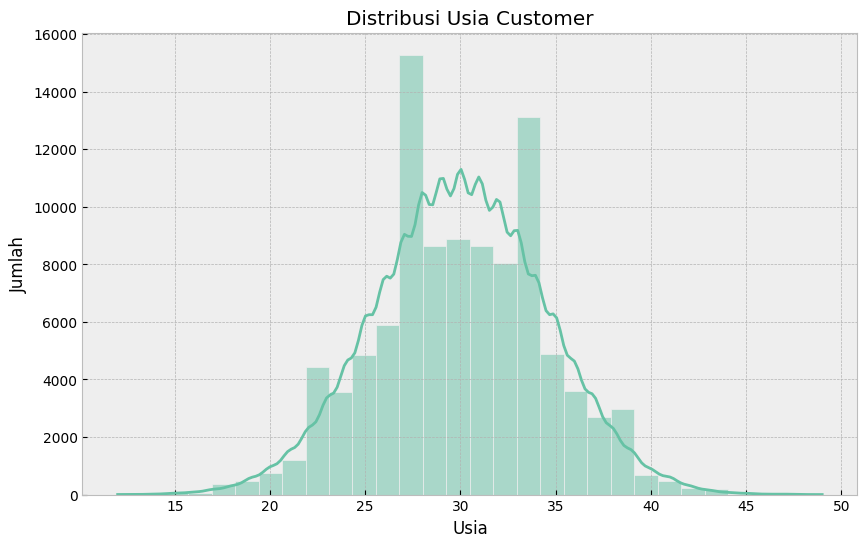

In [252]:
# Distribusi usia customers
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribusi Usia Customer')
plt.xlabel('Usia')
plt.ylabel('Jumlah')
plt.show()

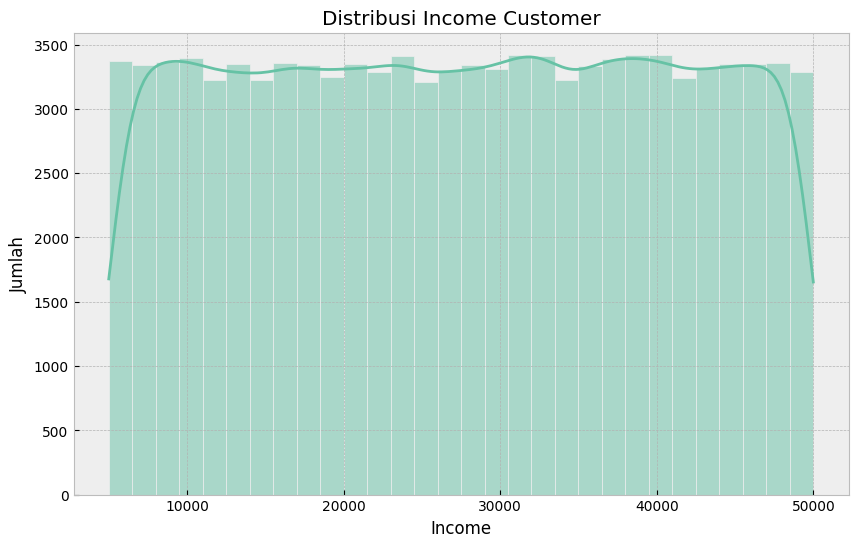

In [253]:
# Distribusi income
plt.figure(figsize=(10, 6))
sns.histplot(df['income'], bins=30, kde=True)
plt.title('Distribusi Income Customer')
plt.xlabel('Income')
plt.ylabel('Jumlah')
plt.show()

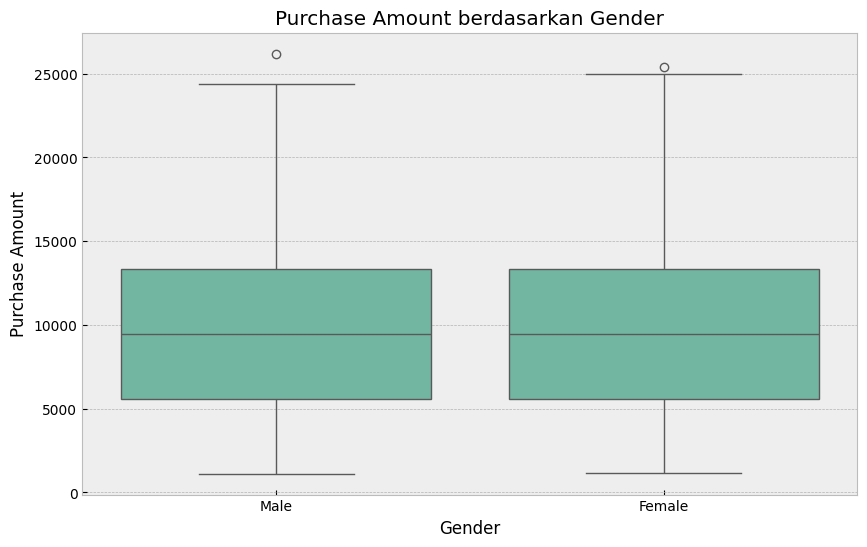

In [254]:
# Purchase amount by gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='purchase_amount', data=df)
plt.title('Purchase Amount berdasarkan Gender')
plt.xlabel('Gender')
plt.ylabel('Purchase Amount')
plt.show()

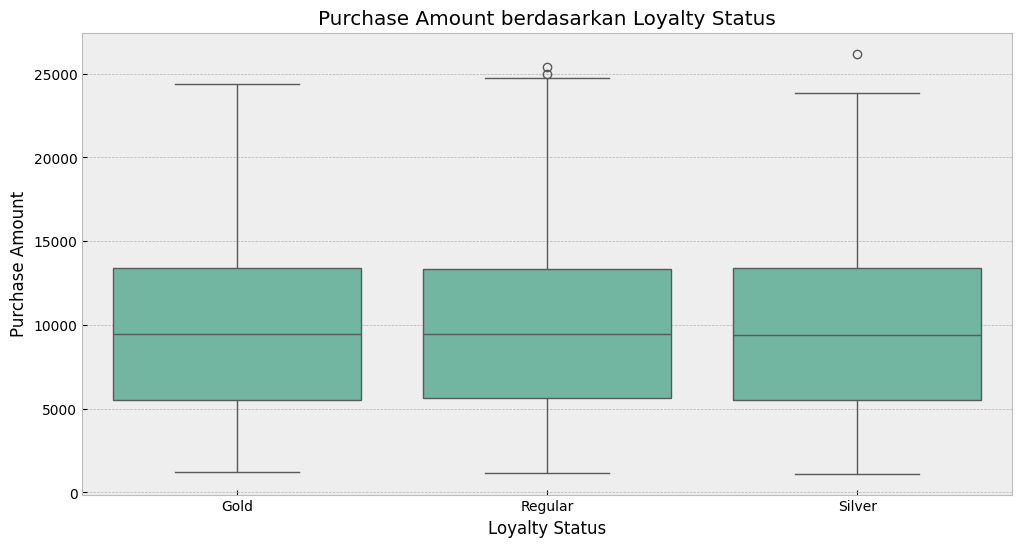

In [255]:
# Purchase amount by loyalty status
plt.figure(figsize=(12, 6))
sns.boxplot(x='loyalty_status', y='purchase_amount', data=df)
plt.title('Purchase Amount berdasarkan Loyalty Status')
plt.xlabel('Loyalty Status')
plt.ylabel('Purchase Amount')
plt.show()

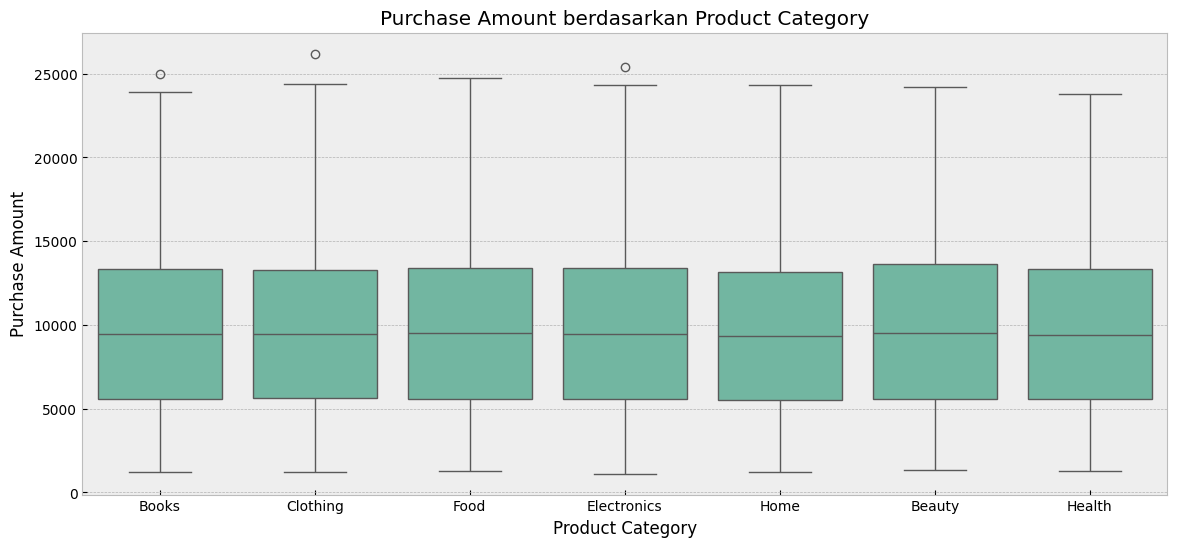

In [256]:
# Purchase amount by product category
plt.figure(figsize=(14, 6))
sns.boxplot(x='product_category', y='purchase_amount', data=df)
plt.title('Purchase Amount berdasarkan Product Category')
plt.xlabel('Product Category')
plt.ylabel('Purchase Amount')
plt.show()

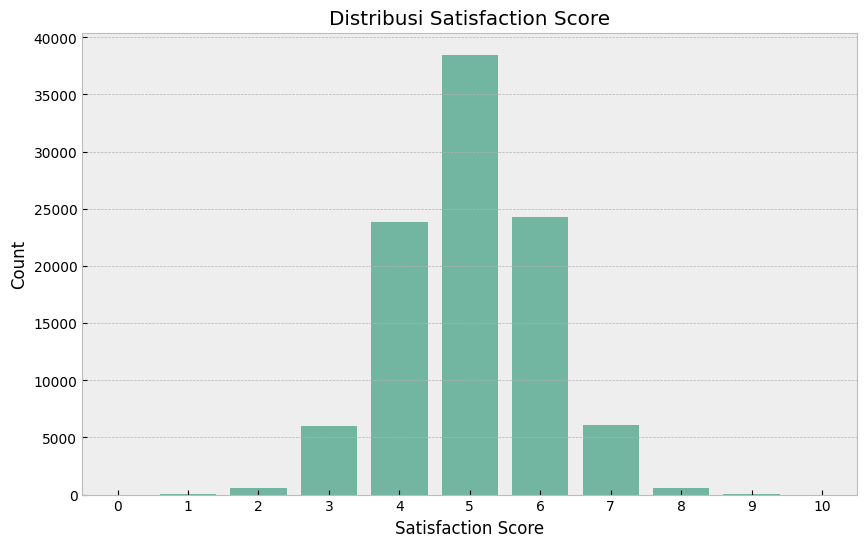

In [257]:
# Satisfaction score distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='satisfaction_score', data=df)
plt.title('Distribusi Satisfaction Score')
plt.xlabel('Satisfaction Score')
plt.ylabel('Count')
plt.show()

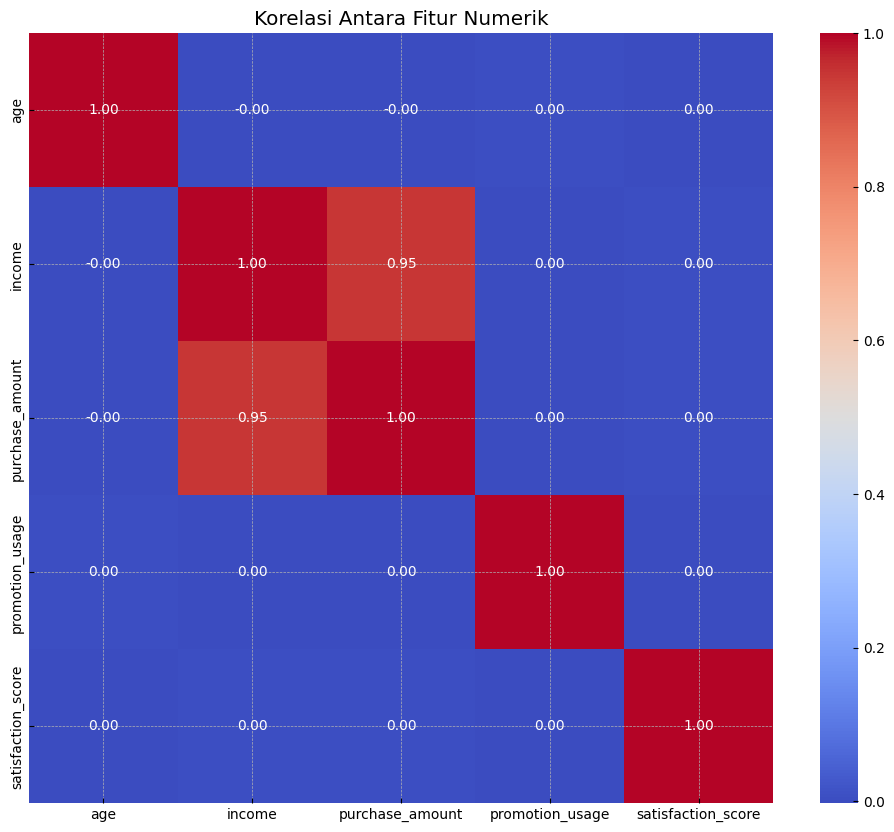

In [258]:
# Correlation between numerical features
numerical_features = ['age', 'income', 'purchase_amount', 'promotion_usage', 'satisfaction_score']
plt.figure(figsize=(12, 10))
correlation = df[numerical_features].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Antara Fitur Numerik')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [259]:
# CustomerID tidak digunakan dalam clustering
if 'id' in df.columns:
    df = df.drop('id', axis=1)
    print("Menghapus kolom 'id' dari dataset.")
else:
    print("Tidak ada kolom 'id' dalam dataset.")

# Membuat salinan dari dataset asli
df_original = df.copy()

# Konversi kategorial ke numerik menggunakan pendekatan mapping manual untuk beberapa fitur kategorikal
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})

mapping_freq = {'rare': 0, 'occasional': 1, 'frequent': 2}
df['purchase_frequency'] = df['purchase_frequency'].map(mapping_freq)

mapping_loyalty = {'Regular': 0, 'Silver': 1, 'Gold': 2}
df['loyalty_status'] = df['loyalty_status'].map(mapping_loyalty)

# Buat dictionary untuk menyimpan encoder setiap kolom
label_encoders = {}

# Ubah kolom kategorikal lainnya menjadi angka dan simpan encoder-nya
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Simpan encoder untuk kolom ini

print("\nDataset setelah encoding dan drop CustomerID:")
print(df.head())

Menghapus kolom 'id' dari dataset.

Dataset setelah encoding dan drop CustomerID:
   age  gender  income  education  region  loyalty_status  purchase_frequency  \
0   27       0   40682          0       0               2                   2   
1   29       0   15317          3       3               0                   0   
2   37       0   38849          0       3               1                   0   
3   30       0   11568          2       2               0                   2   
4   31       1   46952          1       1               0                   1   

   purchase_amount  product_category  promotion_usage  satisfaction_score  
0            18249                 1                0                   6  
1             4557                 2                1                   6  
2            11822                 2                0                   6  
3             4098                 4                0                   7  
4            19685                 2               

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.


Bentuk fitur setelah seleksi: (100000, 11)
Untuk k = 2: WCSS = 4956699415360.10, Silhouette Score = 0.6125
Untuk k = 3: WCSS = 2325884420616.36, Silhouette Score = 0.5620
Untuk k = 4: WCSS = 1398638786305.94, Silhouette Score = 0.5296
Untuk k = 5: WCSS = 972096750101.42, Silhouette Score = 0.5033
Untuk k = 6: WCSS = 733467776615.68, Silhouette Score = 0.4845


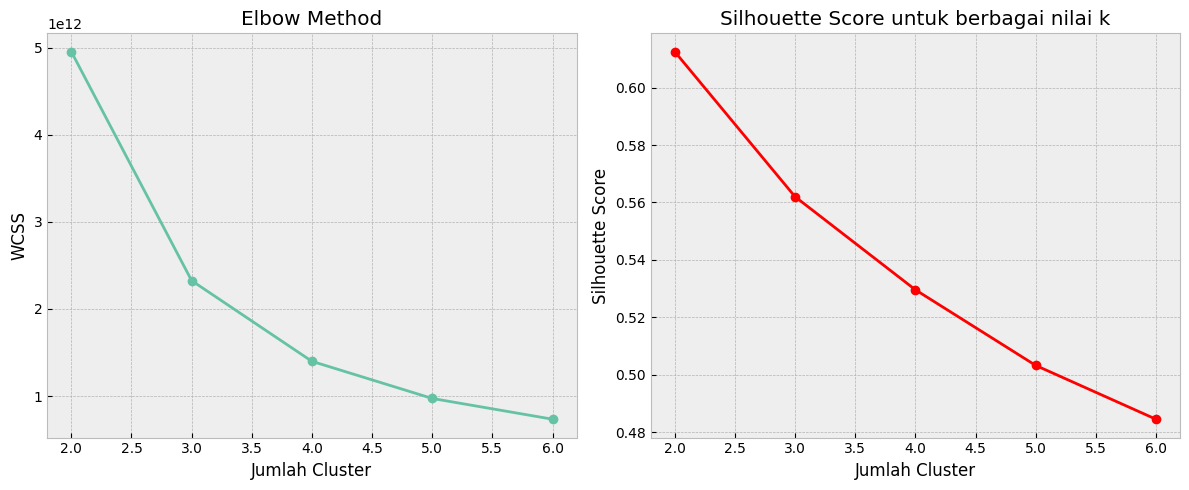

In [260]:
# Inisialisasi VarianceThreshold dengan threshold=0.0 (menghapus fitur dengan variansi nol)
selector = VarianceThreshold(threshold=0.0)
features_selected = selector.fit_transform(df)

print("\nBentuk fitur setelah seleksi:", features_selected.shape)

# Menentukan jumlah cluster optimal dengan Elbow Method dan Silhouette Score
wcss = []              # Simpan Within-Cluster Sum of Squares
silhouette_scores = []  # Simpan Silhouette Score

# Mencoba k dari 2 hingga 6
k_values = range(2, 7)
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=500, random_state=42)
    labels = kmeans.fit_predict(features_selected)
    wcss.append(kmeans.inertia_)
    score = silhouette_score(features_selected, labels)
    silhouette_scores.append(score)
    print(f"Untuk k = {k}: WCSS = {kmeans.inertia_:.2f}, Silhouette Score = {score:.4f}")

# Plot Elbow Method dan Silhouette Score side-by-side
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(list(k_values), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Jumlah Cluster")
plt.ylabel("WCSS")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(list(k_values), silhouette_scores, marker='o', color='red')
plt.title("Silhouette Score untuk berbagai nilai k")
plt.xlabel("Jumlah Cluster")
plt.ylabel("Silhouette Score")
plt.grid(True)

plt.tight_layout()
plt.show()

In [261]:
# Menentukan jumlah cluster optimal berdasarkan nilai silhouette tertinggi
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"\nJumlah cluster optimal: {optimal_k}")


Jumlah cluster optimal: 2


In [262]:
# Membangun model K-Means dengan jumlah cluster optimal
kmeans_final = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, max_iter=500, random_state=42)
cluster_labels = kmeans_final.fit_predict(features_selected)

# Menambahkan label cluster ke dataset
df['Cluster'] = cluster_labels
df_original['Cluster'] = cluster_labels
print("\nDataset dengan label cluster:")
print(df.head())


Dataset dengan label cluster:
   age  gender  income  education  region  loyalty_status  purchase_frequency  \
0   27       0   40682          0       0               2                   2   
1   29       0   15317          3       3               0                   0   
2   37       0   38849          0       3               1                   0   
3   30       0   11568          2       2               0                   2   
4   31       1   46952          1       1               0                   1   

   purchase_amount  product_category  promotion_usage  satisfaction_score  \
0            18249                 1                0                   6   
1             4557                 2                1                   6   
2            11822                 2                0                   6   
3             4098                 4                0                   7   
4            19685                 2                1                   5   

   Cluster  
0     

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [263]:
final_silhouette = silhouette_score(features_selected, cluster_labels)
print(f"Silhouette Score dari model clustering: {final_silhouette:.4f}")

Silhouette Score dari model clustering: 0.6125


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [264]:
# Pipeline berbeda, sudah dilakukan sebelum tahap menentukan jumlah cluster

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [265]:
# 1. Apply PCA for 2D visualization
print("\nApplying PCA for 2D visualization...")
pca_viz = PCA(n_components=2)
principal_components = pca_viz.fit_transform(features_selected)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = cluster_labels


Applying PCA for 2D visualization...


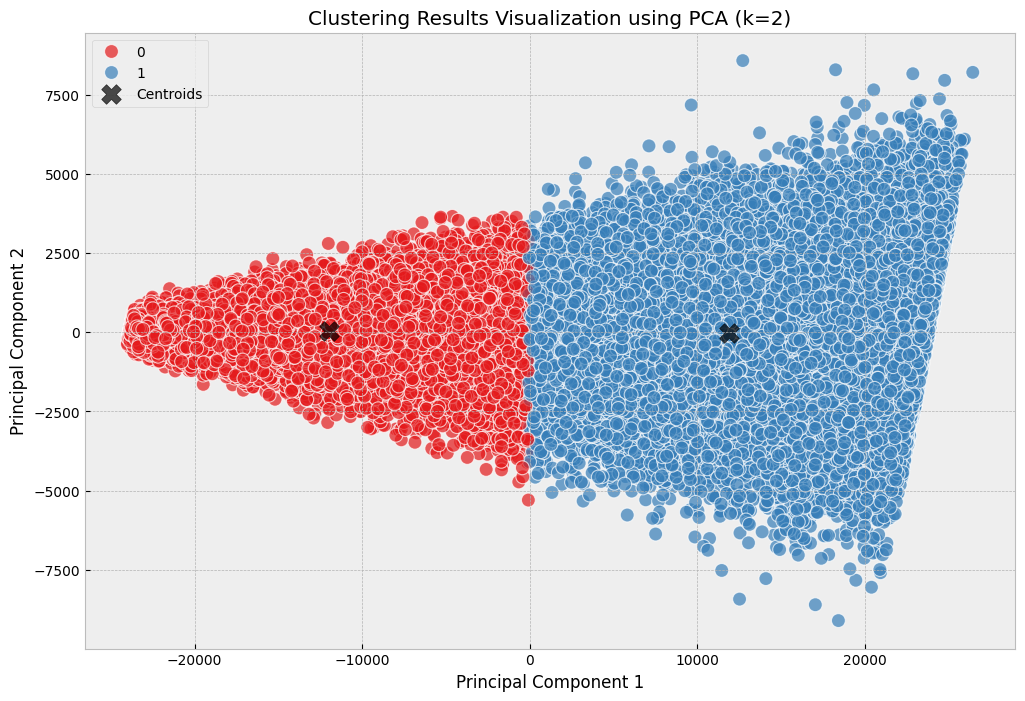

In [266]:
# 2. Scatter plot using PCA components
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='Set1', s=100, alpha=0.7)
plt.title(f'Clustering Results Visualization using PCA (k={optimal_k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add cluster centers projected to 2D PCA space
centers_pca = pca_viz.transform(kmeans_final.cluster_centers_)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], s=200, c='black', marker='X', alpha=0.7, label='Centroids')
plt.legend()
plt.grid(True)
plt.show()

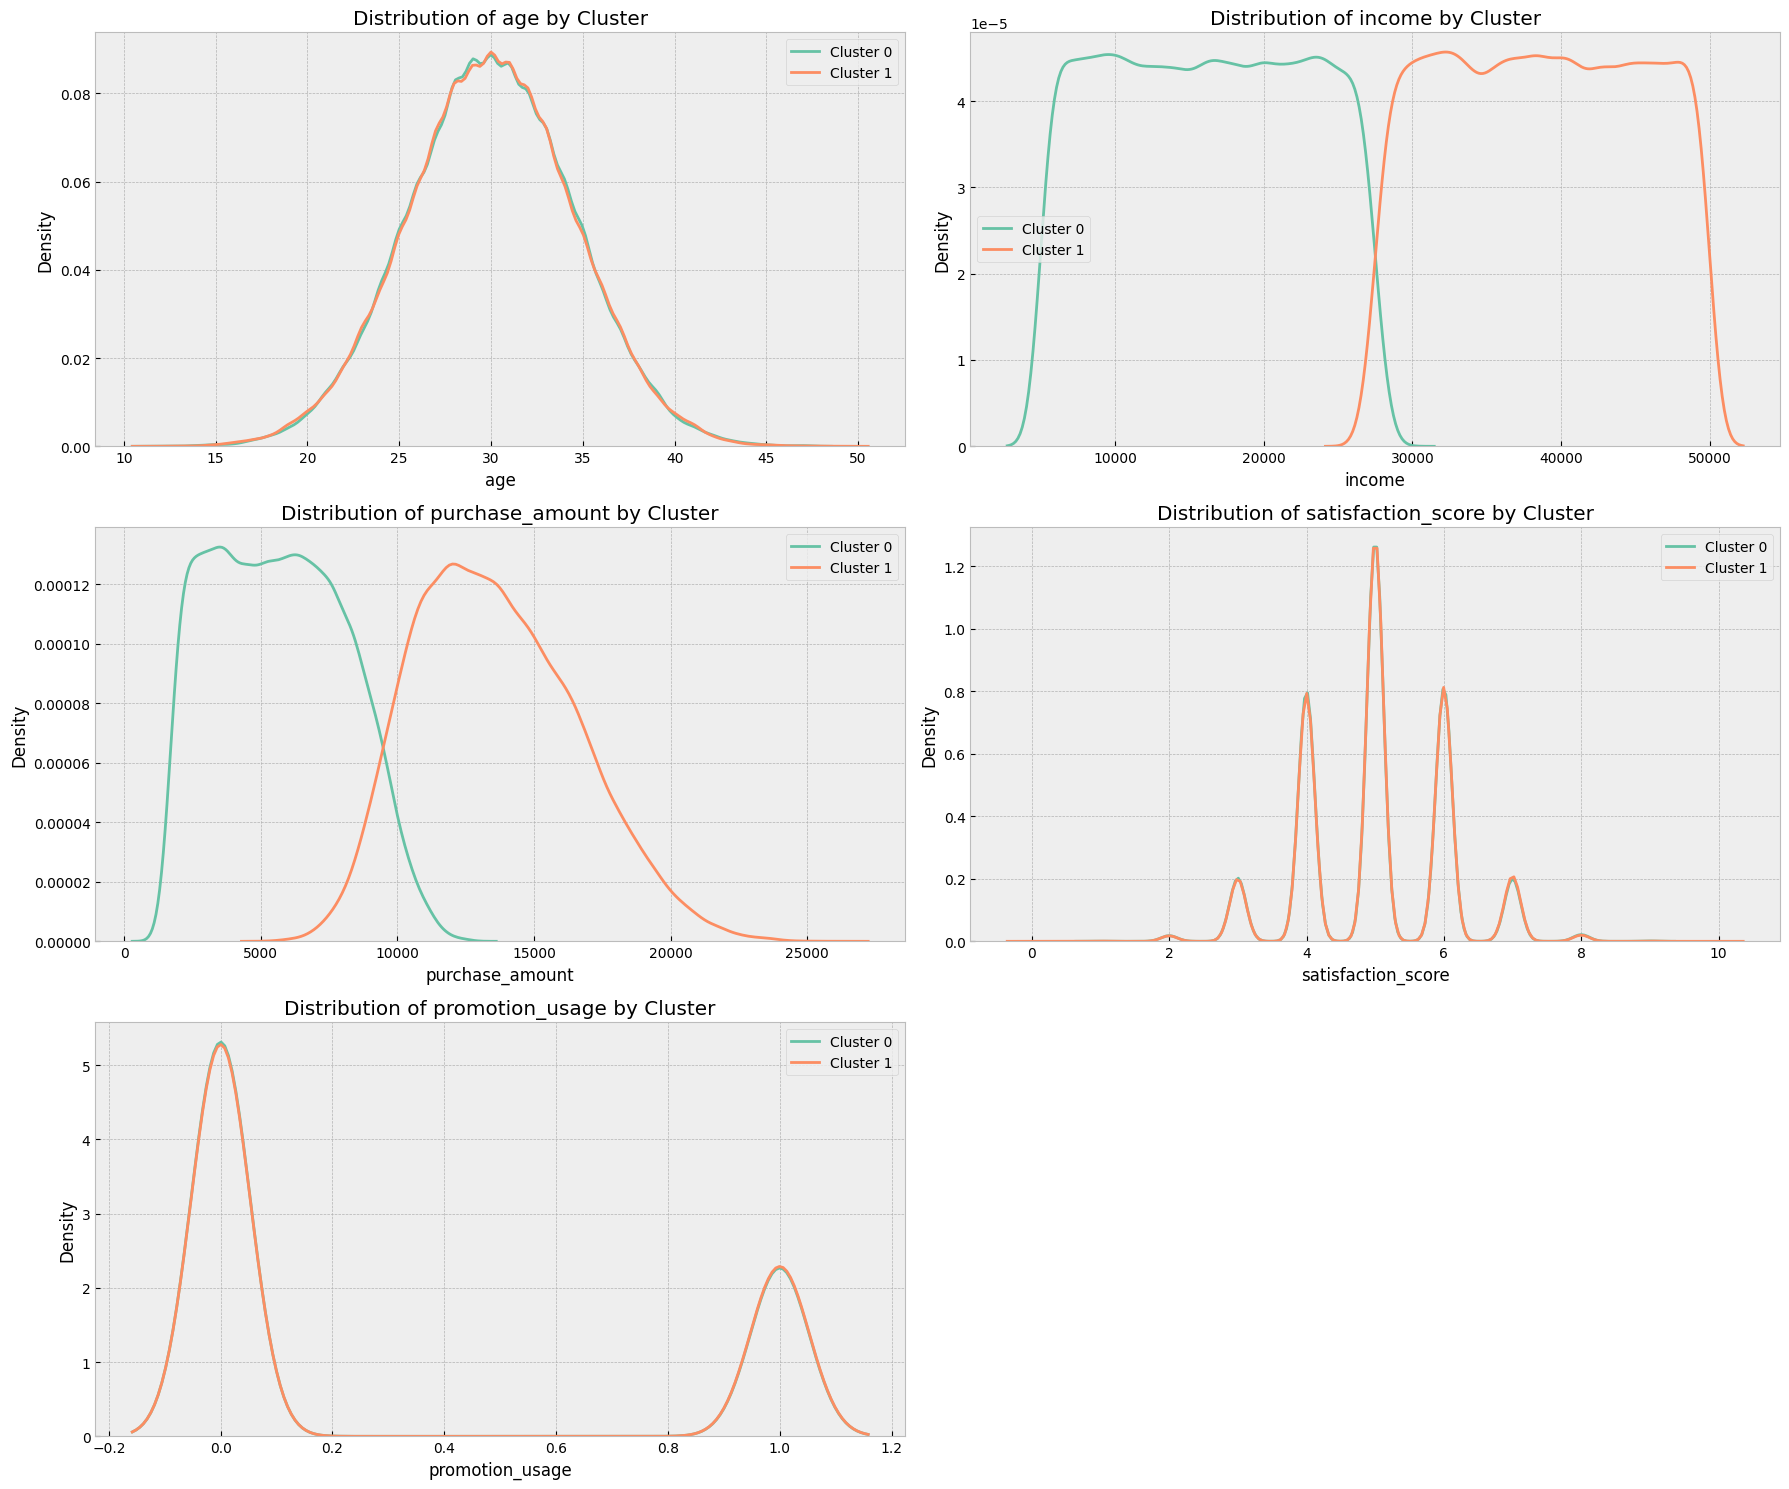

In [267]:
# 3. Feature distribution by cluster for key numerical features
# Select key features to visualize
key_features = ['age', 'income', 'purchase_amount', 'satisfaction_score', 'promotion_usage']
fig, axes = plt.subplots(3, 2, figsize=(18, 15))
axes = axes.flatten()

for i, feature in enumerate(key_features):
    if i < len(axes):  # Ensure we don't exceed the number of subplots
        for cluster in range(optimal_k):
            cluster_data = df[df['Cluster'] == cluster][feature]
            if len(cluster_data) > 0:  # Make sure there's data in the cluster
                sns.kdeplot(cluster_data, label=f'Cluster {cluster}', ax=axes[i])

        axes[i].set_title(f'Distribution of {feature} by Cluster')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Density')
        axes[i].legend()

# Remove any unused subplots
for i in range(len(key_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

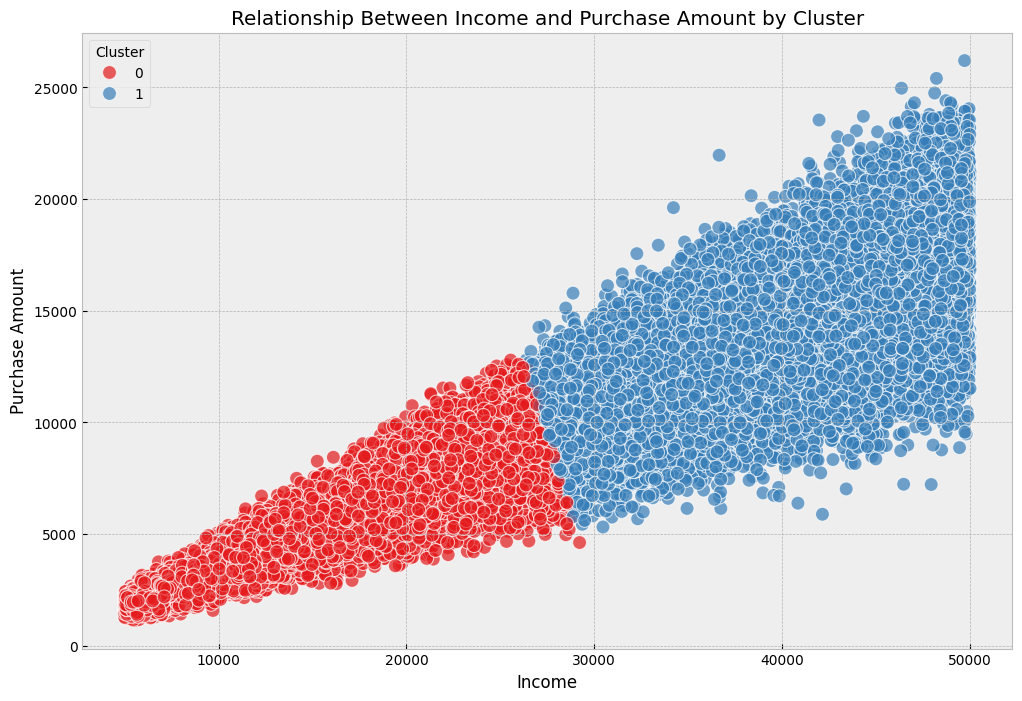

In [268]:
# 4. Relationship between purchase amount and income by cluster
plt.figure(figsize=(12, 8))
sns.scatterplot(x='income', y='purchase_amount', hue='Cluster', data=df, palette='Set1', s=100, alpha=0.7)
plt.title('Relationship Between Income and Purchase Amount by Cluster')
plt.xlabel('Income')
plt.ylabel('Purchase Amount')
plt.grid(True)
plt.show()

<Figure size 1200x800 with 0 Axes>

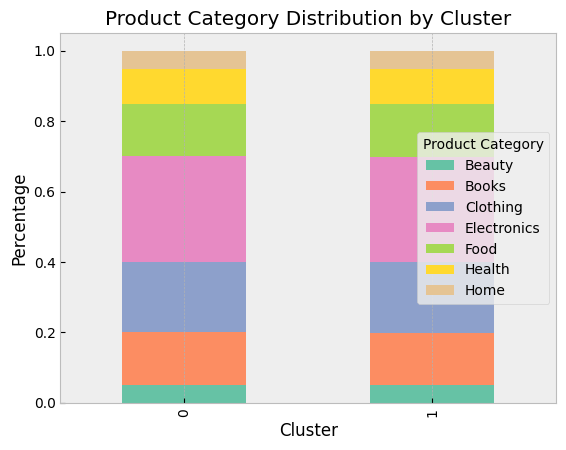

In [269]:
# 5. Product category distribution by cluster (menggunakan dataframe asli)
plt.figure(figsize=(12, 8))
pd.crosstab(df_original['Cluster'], df_original['product_category'], normalize='index').plot(kind='bar', stacked=True)
plt.title('Product Category Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Percentage')
plt.legend(title='Product Category')
plt.grid(axis='y')
plt.show()

<Figure size 1200x800 with 0 Axes>

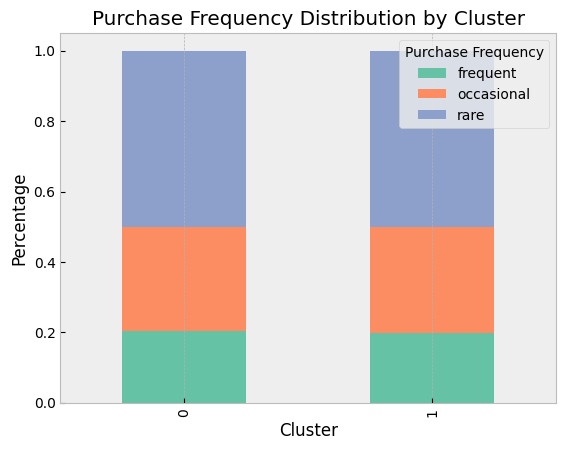

In [270]:
# 6. Purchase frequency distribution by cluster
plt.figure(figsize=(12, 8))
pd.crosstab(df_original['Cluster'], df_original['purchase_frequency'], normalize='index').plot(kind='bar', stacked=True)
plt.title('Purchase Frequency Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Percentage')
plt.legend(title='Purchase Frequency')
plt.grid(axis='y')
plt.show()

<Figure size 1200x800 with 0 Axes>

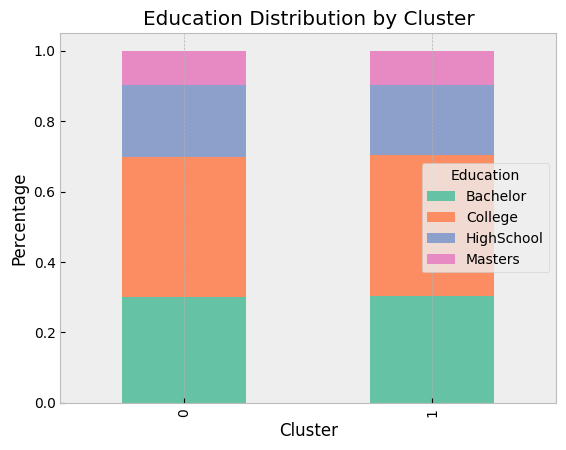

In [271]:
# 7. Education distribution by cluster
plt.figure(figsize=(12, 8))
pd.crosstab(df_original['Cluster'], df_original['education'], normalize='index').plot(kind='bar', stacked=True)
plt.title('Education Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Percentage')
plt.legend(title='Education')
plt.grid(axis='y')
plt.show()

<Figure size 1200x800 with 0 Axes>

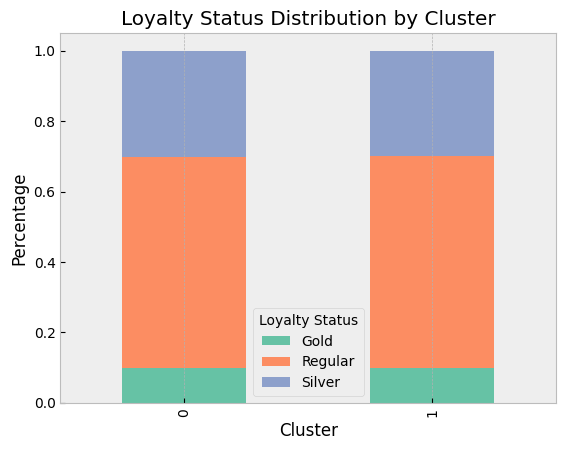

In [272]:
# 8. Loyalty status distribution by cluster
plt.figure(figsize=(12, 8))
pd.crosstab(df_original['Cluster'], df_original['loyalty_status'], normalize='index').plot(kind='bar', stacked=True)
plt.title('Loyalty Status Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Percentage')
plt.legend(title='Loyalty Status')
plt.grid(axis='y')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [273]:
# 1. Calculate mean values of key features for each cluster
numeric_cols = df.select_dtypes(include=['number']).columns
cluster_summary = df.groupby('Cluster')[numeric_cols].mean()
print("\nCluster Summary (Mean Values):")
print(cluster_summary)


Cluster Summary (Mean Values):
               age    gender       income  education    region  \
Cluster                                                          
0        30.013648  0.501636  16223.43145   1.098525  1.499950   
1        29.992945  0.499851  38730.33415   1.089188  1.497439   

         loyalty_status  purchase_frequency  purchase_amount  \
Cluster                                                        
0              0.499348            0.703121      5653.192313   
1              0.495864            0.698416     13588.615386   

         product_category  promotion_usage  satisfaction_score  Cluster  
Cluster                                                                  
0                2.852263         0.299167            5.005961      0.0  
1                2.854948         0.302422            5.013313      1.0  


In [274]:
# 2. Calculate percentage of customers by cluster
cluster_counts = df['Cluster'].value_counts().sort_index()
cluster_percentages = 100 * cluster_counts / len(df)
print("\nPercentage of Customers in Each Cluster:")
for i, percentage in enumerate(cluster_percentages):
    print(f"Cluster {i}: {percentage:.2f}%")


Percentage of Customers in Each Cluster:
Cluster 0: 49.83%
Cluster 1: 50.17%


In [275]:
# 3. Detailed analysis of each cluster
print("\nDetailed Characteristics of Each Cluster:")
for cluster in sorted(df['Cluster'].unique()):
    # Menggunakan df_original untuk sebagian besar analisis
    data_original = df_original[df_original['Cluster'] == cluster]
    # Menggunakan df khusus untuk income dan purchase amount
    cluster_data = df[df['Cluster'] == cluster]

    print(f"\nCLUSTER {cluster} ANALYSIS:")
    print(f"Number of customers: {len(data_original)} ({100*len(data_original)/len(df):.2f}% of total)")
    print(f"Average age: {data_original['age'].mean():.1f} years")
    # Menggunakan df_clear untuk income dan purchase amount
    print(f"Average income: ${cluster_data['income'].mean():.2f}")
    print(f"Average purchase amount: ${cluster_data['purchase_amount'].mean():.2f}")
    print(f"Average satisfaction score: {data_original['satisfaction_score'].mean():.1f}/10")

    # Gender distribution
    gender_dist = data_original['gender'].value_counts(normalize=True) * 100
    for gender, pct in gender_dist.items():
        print(f"{gender}: {pct:.1f}%")

    # Education distribution
    edu_dist = data_original['education'].value_counts(normalize=True) * 100
    for edu, pct in edu_dist.items():
        print(f"Education - {edu}: {pct:.1f}%")

    # Loyalty status distribution
    loyalty_dist = data_original['loyalty_status'].value_counts(normalize=True) * 100
    for status, pct in loyalty_dist.items():
        print(f"Loyalty - {status}: {pct:.1f}%")

    # Purchase frequency distribution
    freq_dist = data_original['purchase_frequency'].value_counts(normalize=True) * 100
    for freq, pct in freq_dist.items():
        print(f"Purchase frequency - {freq}: {pct:.1f}%")

    # Product category distribution
    cat_dist = data_original['product_category'].value_counts(normalize=True) * 100
    for cat, pct in cat_dist.items():
        print(f"Product category - {cat}: {pct:.1f}%")

    print("\n" + "-"*50)


Detailed Characteristics of Each Cluster:

CLUSTER 0 ANALYSIS:
Number of customers: 49825 (49.83% of total)
Average age: 30.0 years
Average income: $16223.43
Average purchase amount: $5653.19
Average satisfaction score: 5.0/10
Female: 50.2%
Male: 49.8%
Education - College: 39.8%
Education - Bachelor: 30.1%
Education - HighSchool: 20.3%
Education - Masters: 9.8%
Loyalty - Regular: 60.0%
Loyalty - Silver: 30.1%
Loyalty - Gold: 9.9%
Purchase frequency - rare: 50.0%
Purchase frequency - occasional: 29.7%
Purchase frequency - frequent: 20.3%
Product category - Electronics: 30.1%
Product category - Clothing: 20.0%
Product category - Books: 15.0%
Product category - Food: 14.7%
Product category - Health: 10.1%
Product category - Home: 5.1%
Product category - Beauty: 5.0%

--------------------------------------------------

CLUSTER 1 ANALYSIS:
Number of customers: 50175 (50.17% of total)
Average age: 30.0 years
Average income: $38730.33
Average purchase amount: $13588.62
Average satisfaction s

<Figure size 1600x1000 with 0 Axes>

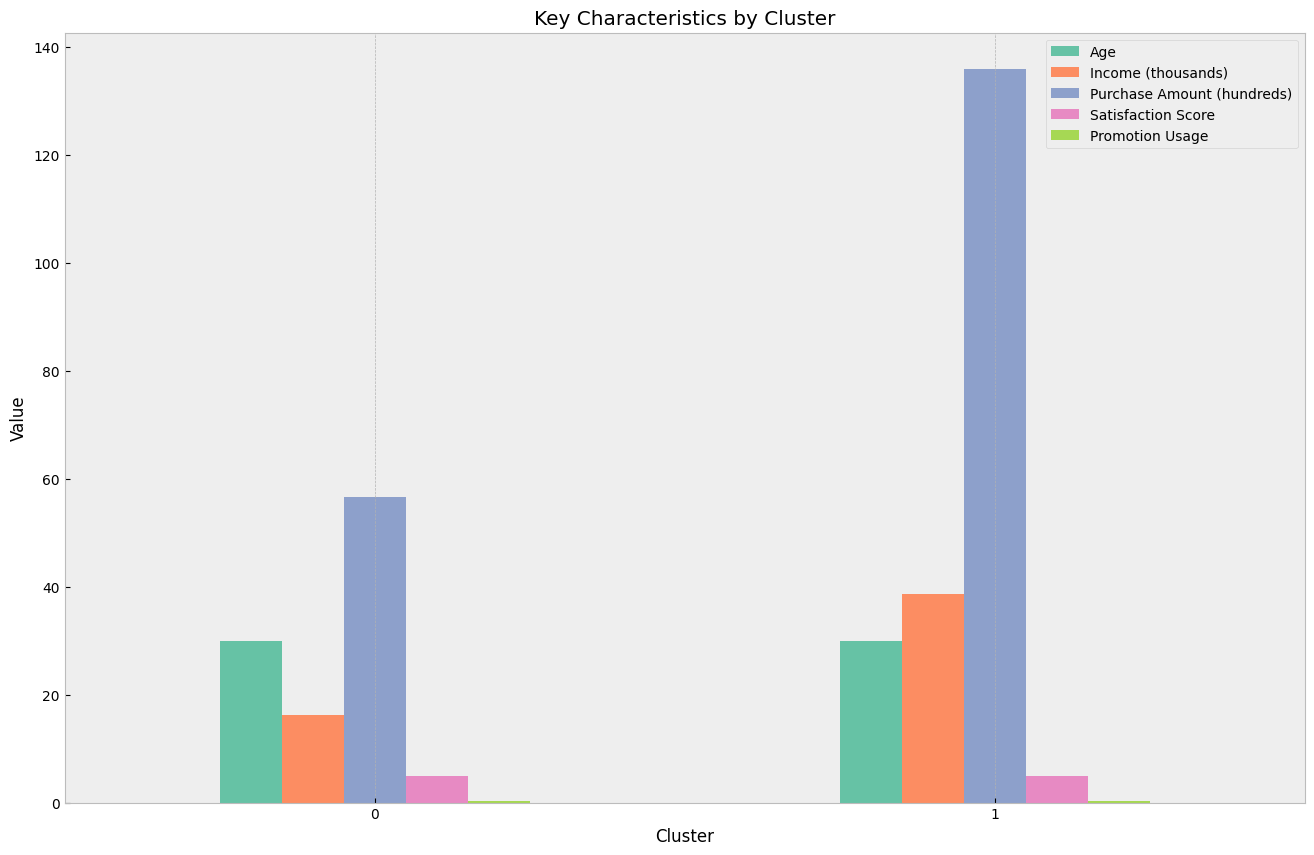

In [276]:
# 4. Visualize key characteristics of each cluster
plt.figure(figsize=(16, 10))
pd.DataFrame({
    'Age': cluster_summary['age'],
    'Income (thousands)': cluster_summary['income'] / 1000,  # Scale for better visualization
    'Purchase Amount (hundreds)': cluster_summary['purchase_amount'] / 100,  # Scale for better visualization
    'Satisfaction Score': cluster_summary['satisfaction_score'],
    'Promotion Usage': cluster_summary['promotion_usage']
}).plot(kind='bar', figsize=(16, 10))
plt.title('Key Characteristics by Cluster')
plt.ylabel('Value')
plt.xticks(rotation=0)
plt.legend(loc='best')
plt.grid(axis='y')
plt.show()

### Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

#### Cluster 1:
- Rata-rata Annual Income: 16223.43
- Rata-rata Jumlah Pengeluaran: 5653.19
- Analisis: Cluster ini memiliki rata-rata pendapatan tahunan yang rendah 16.2k dan pengeluaran yang juga rendah 5.6k. Hal ini mengindikasikan bahwa pelanggan dalam cluster ini kemungkinan berasal dari kelompok ekonomi menengah ke bawah, dengan daya beli yang terbatas. Selain itu, pelanggan dalam kelompok ini mungkin lebih selektif dalam melakukan pembelian, cenderung membeli produk dengan harga lebih terjangkau, atau hanya membeli barang yang benar-benar dibutuhkan.

#### Cluster 2:
- Rata-rata Annual Income: 38730.33
- Rata-rata Jumlah Pengeluaran: 13588.62
- Analisis: Cluster ini memiliki rata-rata pendapatan tahunan yang lebih tinggi 38.7k dan pengeluaran yang juga lebih besar 13.5k. Pelanggan dalam cluster ini cenderung memiliki daya beli yang lebih baik dan lebih sering melakukan pembelian dalam jumlah besar. Mereka mungkin termasuk dalam kategori pelanggan loyal yang aktif menggunakan promo atau pelanggan yang mengutamakan kualitas dibanding harga.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [277]:
# Simpan hasil clustering ke dalam file CSV
df_original.to_csv('clustering_results.csv', index=False)
df.to_csv('clustering_results_numerical.csv', index=False)
print("Data dengan label cluster berhasil disimpan ke 'clustering_results.csv'")

Data dengan label cluster berhasil disimpan ke 'clustering_results.csv'
